In [1]:
import os
import subprocess
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
os.chdir("../../DataSet/")
os.getcwd()


'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet'

In [62]:
emNAR1 = pd.read_csv('NARdata.csv',index_col=0)
emAR1 = pd.read_csv('ARdata.csv',index_col=0)

scoreAR1 = pd.read_csv('ARScoredata.csv',index_col=0)
scoreNAR1 = pd.read_csv('NARScoredata.csv',index_col=0)

In [63]:
scoreNAR1

,User,Section,Jump,Positive,Negative,Time
49,User_9,Section_0,True,False,False,2019-12-11-12-34-37
50,User_9,Section_0,False,True,False,2019-12-11-12-34-40
51,User_9,Section_0,True,False,False,2019-12-11-12-34-42
52,User_9,Section_0,True,False,False,2019-12-11-12-34-43
53,User_9,Section_0,False,False,True,2019-12-11-12-34-45
...,...,...,...,...,...,...
893,User_8,Section_3,True,False,False,2019-12-4-15-10-32
894,User_8,Section_3,False,True,False,2019-12-4-15-10-34
895,User_8,Section_3,True,False,False,2019-12-4-15-10-34
896,User_8,Section_3,False,True,False,2019-12-4-15-10-40


In [64]:
aggregation_functions = {'User': 'first', 'Section': 'first','Jump':'max', 'Positive':'max','Negative':'max'}
fmt = '%Y-%m-%d-%H-%M-%S'

scoreNAR1['timestamp'] = scoreNAR1['Time'].apply(lambda x: datetime.strptime(x, fmt))
scoreAR1['timestamp'] = scoreAR1['Time'].apply(lambda x: datetime.strptime(x, fmt))

del scoreNAR1['Time']
del scoreAR1['Time']

scoreNAR1 = scoreNAR1.groupby(scoreNAR1['timestamp']).aggregate(aggregation_functions).reset_index()
scoreAR1 = scoreAR1.groupby(scoreAR1['timestamp']).aggregate(aggregation_functions).reset_index()



In [65]:
fmt1 = '%Y-front-%m-%d-%H-%M-%S.jpg'

emNAR1['timestamp'] = emNAR1['ImageName'].apply(lambda x: datetime.strptime('2019-'+x, fmt1))
emAR1['timestamp'] = emAR1['ImageName'].apply(lambda x: datetime.strptime('2019-'+x, fmt1))

In [66]:
posNAR1 = scoreNAR1.loc[(scoreNAR1['Positive']== 1)]
negNAR1 = scoreNAR1.loc[(scoreNAR1['Negative']== 1)]

posAR1 = scoreAR1.loc[(scoreAR1['Positive']== 1)]
negAR1 = scoreAR1.loc[(scoreAR1['Negative']== 1)]

In [67]:
prevPosEmAR = pd.DataFrame()
nextPosEmAR = pd.DataFrame()
prevPosEmNAR = pd.DataFrame()
nextPosEmNAR = pd.DataFrame()

prevNegEmAR = pd.DataFrame()
nextNegEmAR = pd.DataFrame()
prevNegEmNAR = pd.DataFrame()
nextNegEmNAR = pd.DataFrame()

PosEmAR = pd.DataFrame()
PosEmNAR = pd.DataFrame()
NegEmAR = pd.DataFrame()
NegEmNAR = pd.DataFrame()


#Adjacent Positive AR Records
for x in range(len(posAR1)):
    for j in range(len(emAR1)):
        if posAR1.iloc[x]['timestamp'] == emAR1.iloc[j]['timestamp']:
            print("{} : {}".format(x,j))
            try:
                prevPosEmAR = prevPosEmAR.append(emAR1.iloc[j-1])
                PosEmAR = PosEmAR.append(emAR1.iloc[j])
                nextPosEmAR = nextPosEmAR.append(emAR1.iloc[j+1])
            except Exception as e:
                print(e)
            continue
print("Adjacent Positive AR Records Completed")
            
            
#Adjacent Positive NAR Records
for x in range(len(posNAR1)):
    for j in range(len(emNAR1)):
        if posNAR1.iloc[x]['timestamp'] == emNAR1.iloc[j]['timestamp']:
            print("{} : {}".format(x,j))
            try:
                prevPosEmNAR = prevPosEmNAR.append(emNAR1.iloc[j-1])
                PosEmNAR = PosEmNAR.append(emNAR1.iloc[j])
                nextPosEmNAR = nextPosEmNAR.append(emNAR1.iloc[j+1])
            except Exception as e:
                print(e)
            continue
print("Adjacent Positive NAR Records Completed")


#Adjacent Negative AR Records
for x in range(len(negAR1)):
    for j in range(len(emAR1)):
        if negAR1.iloc[x]['timestamp'] == emAR1.iloc[j]['timestamp']:
            print("{} : {}".format(x,j))
            try:
                prevNegEmAR = prevNegEmAR.append(emAR1.iloc[j-1])
                NegEmAR = NegEmAR.append(emAR1.iloc[j])
                nextNegEmAR = nextNegEmAR.append(emAR1.iloc[j+1])
            except Exception as e:
                print(e)
            continue
print("Adjacent Negative AR Records Completed")



#Adjacent Negative NAR Records
for x in range(len(negNAR1)):
    for j in range(len(emNAR1)):
        if negNAR1.iloc[x]['timestamp'] == emNAR1.iloc[j]['timestamp']:
            print("{} : {}".format(x,j))
            try:
                prevNegEmNAR = prevNegEmNAR.append(emNAR1.iloc[j-1])
                NegEmNAR = NegEmNAR.append(emNAR1.iloc[j])
                nextNegEmNAR = nextNegEmNAR.append(emNAR1.iloc[j+1])
            except Exception as e:
                print(e)
            continue
print("Adjacent Negative NAR Records Completed")



0 : 980
1 : 983
4 : 1003
5 : 1029
6 : 1031
8 : 1040
10 : 1045
11 : 1046
12 : 1069
13 : 1074
14 : 1082
15 : 1085
18 : 1152
20 : 1251
21 : 1256
22 : 1264
23 : 1268
24 : 1270
29 : 1300
30 : 1307
31 : 1310
32 : 1335
33 : 1338
34 : 1341
35 : 1346
36 : 1353
37 : 1356
38 : 1358
39 : 1366
40 : 1388
41 : 1415
42 : 1626
43 : 1773
44 : 1790
46 : 1845
47 : 1851
48 : 1852
49 : 1856
50 : 1865
51 : 1876
53 : 1877
56 : 1881
57 : 1883
60 : 1888
61 : 1891
65 : 1960
66 : 1997
69 : 2089
70 : 2111
71 : 2248
73 : 2320
83 : 2335
101 : 2340
103 : 2342
106 : 2358
107 : 2359
108 : 2361
111 : 2368
112 : 2369
116 : 2378
118 : 2401
119 : 2688
120 : 2702
121 : 2745
122 : 2768
124 : 2796
125 : 2810
128 : 2850
129 : 2854
130 : 2862
131 : 2865
132 : 2867
133 : 2873
134 : 2875
135 : 2876
136 : 2879
137 : 2882
138 : 2884
139 : 2906
140 : 2932
141 : 2952
142 : 2954
143 : 2977
144 : 3007
146 : 3034
147 : 3039
148 : 3043
149 : 3065
150 : 3068
151 : 3069
152 : 3072
198 : 3112
199 : 3116
200 : 3123
201 : 3129
230 : 60
231 : 

In [68]:
prevPosEmAR.head(4)


,Angry,Disgust,Emotion,Fear,Happy,ImageName,Neutral,Sad,Section,Surprise,User,timestamp
979,0.0,0.0,fear,1.0,0.0,front-11-25-09-35-57.jpg,0.0,0.0,Section_0,0.0,User_1,2019-11-25 09:35:57
982,0.0,0.0,fear,1.0,0.0,front-11-25-09-36-00.jpg,0.0,0.0,Section_0,0.0,User_1,2019-11-25 09:36:00
1002,0.0,0.0,neutral,0.0,0.0,front-11-25-09-37-17.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:17
1028,0.0,0.0,neutral,0.0,0.0,front-11-25-09-37-45.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:45


In [10]:
PosEmAR.head(4)

,Angry,Disgust,Emotion,Fear,Happy,ImageName,Neutral,Sad,Section,Surprise,User,timestamp
980,0.0,0.0,fear,1.0,0.0,front-11-25-09-35-58.jpg,0.0,0.0,Section_0,0.0,User_1,2019-11-25 09:35:58
983,0.0,0.0,fear,1.0,0.0,front-11-25-09-36-01.jpg,0.0,0.0,Section_0,0.0,User_1,2019-11-25 09:36:01
1003,0.0,0.0,neutral,0.0,0.0,front-11-25-09-37-18.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:18
1029,0.0,0.0,fear,1.0,0.0,front-11-25-09-37-46.jpg,0.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:46


In [11]:
nextPosEmAR.head(4)

,Angry,Disgust,Emotion,Fear,Happy,ImageName,Neutral,Sad,Section,Surprise,User,timestamp
981,0.0,0.0,fear,1.0,0.0,front-11-25-09-35-59.jpg,0.0,0.0,Section_0,0.0,User_1,2019-11-25 09:35:59
984,0.0,0.0,fear,1.0,0.0,front-11-25-09-36-02.jpg,0.0,0.0,Section_0,0.0,User_1,2019-11-25 09:36:02
1004,0.0,0.0,neutral,0.0,0.0,front-11-25-09-37-19.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:19
1030,0.0,0.0,neutral,0.0,0.0,front-11-25-09-37-47.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:47


In [69]:

mapping = { 'angry': 'Negative', 'fear' : 'Removed', 'happy' : 'Positive', 'sad' : 'Negative', 'surprise' : 'Positive', 'neutral' : 'Neutral'}
prevPosEmAR['Emotion'] = prevPosEmAR['Emotion'].apply(lambda x: mapping[x])
nextPosEmAR['Emotion'] = nextPosEmAR['Emotion'].apply(lambda x: mapping[x])
prevPosEmNAR['Emotion'] = prevPosEmNAR['Emotion'].apply(lambda x: mapping[x])
nextPosEmNAR['Emotion'] = nextPosEmNAR['Emotion'].apply(lambda x: mapping[x]) 

prevNegEmAR['Emotion'] = prevNegEmAR['Emotion'].apply(lambda x: mapping[x])
nextNegEmAR['Emotion'] = nextNegEmAR['Emotion'].apply(lambda x: mapping[x])
prevNegEmNAR['Emotion'] = prevNegEmNAR['Emotion'].apply(lambda x: mapping[x])
nextNegEmNAR['Emotion'] = nextNegEmNAR['Emotion'].apply(lambda x: mapping[x])

PosEmAR['Emotion'] = PosEmAR['Emotion'].apply(lambda x: mapping[x])
PosEmNAR['Emotion'] = PosEmNAR['Emotion'].apply(lambda x: mapping[x])
NegEmAR['Emotion'] = NegEmAR['Emotion'].apply(lambda x: mapping[x])
NegEmNAR['Emotion'] = NegEmNAR['Emotion'].apply(lambda x: mapping[x])



In [73]:
prevPosEmAR = prevPosEmAR[prevPosEmAR.Emotion != 'Removed']
nextPosEmAR = nextPosEmAR[nextPosEmAR.Emotion != 'Removed']
prevPosEmNAR = prevPosEmNAR[prevPosEmNAR.Emotion != 'Removed']
nextPosEmNAR = nextPosEmNAR[nextPosEmNAR.Emotion != 'Removed']

prevNegEmAR = prevNegEmAR[prevNegEmAR.Emotion != 'Removed']
nextNegEmAR = nextNegEmAR[nextNegEmAR.Emotion != 'Removed']
prevNegEmNAR = prevNegEmNAR[prevNegEmNAR.Emotion != 'Removed']
nextNegEmNAR = nextNegEmNAR[nextNegEmNAR.Emotion != 'Removed']

PosEmAR = PosEmAR[PosEmAR.Emotion != 'Removed']
PosEmNAR = PosEmNAR[PosEmNAR.Emotion != 'Removed']
NegEmAR = NegEmAR[NegEmAR.Emotion != 'Removed']
NegEmNAR = NegEmNAR[NegEmNAR.Emotion != 'Removed']



In [74]:
prevPosEmAR

,Angry,Disgust,Emotion,Fear,Happy,ImageName,Neutral,Sad,Section,Surprise,User,timestamp
1002,0.0,0.0,Neutral,0.0,0.0,front-11-25-09-37-17.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:17
1028,0.0,0.0,Neutral,0.0,0.0,front-11-25-09-37-45.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:45
1030,0.0,0.0,Neutral,0.0,0.0,front-11-25-09-37-47.jpg,1.0,0.0,Section_1,0.0,User_1,2019-11-25 09:37:47
1068,0.0,0.0,Neutral,0.0,0.0,front-11-25-09-38-46.jpg,1.0,0.0,Section_2,0.0,User_1,2019-11-25 09:38:46
1073,0.0,0.0,Neutral,0.0,0.0,front-11-25-09-38-51.jpg,1.0,0.0,Section_2,0.0,User_1,2019-11-25 09:38:51
...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.0,0.0,Neutral,0.0,0.0,front-12-12-13-38-44.jpg,1.0,0.0,Section_3,0.0,User_10,2019-12-12 13:38:44
440,0.0,0.0,Neutral,0.0,0.0,front-12-12-13-38-50.jpg,1.0,0.0,Section_3,0.0,User_10,2019-12-12 13:38:50
446,0.0,0.0,Neutral,0.0,0.0,front-12-12-13-38-56.jpg,1.0,0.0,Section_3,0.0,User_10,2019-12-12 13:38:56
495,0.0,0.0,Neutral,0.0,0.0,front-12-12-13-39-51.jpg,1.0,0.0,Section_3,0.0,User_10,2019-12-12 13:39:51


In [20]:
# mapping = {'Section3': 'Section_3', 'Section_0': 'Section_1','Section_1': 'Section_2','Section_2': 'Section_3','Section_3': 'Section_4',}


# prevPosEmAR['Section'] = prevPosEmAR['Section'].apply(lambda x: mapping[x])
# nextPosEmAR['Section'] = nextPosEmAR['Section'].apply(lambda x: mapping[x])
# prevPosEmNAR['Section'] = prevPosEmNAR['Section'].apply(lambda x: mapping[x])
# nextPosEmNAR['Section'] = nextPosEmNAR['Section'].apply(lambda x: mapping[x]) 

# prevNegEmAR['Section'] = prevNegEmAR['Section'].apply(lambda x: mapping[x])
# nextNegEmAR['Section'] = nextNegEmAR['Section'].apply(lambda x: mapping[x])
# prevNegEmNAR['Section'] = prevNegEmNAR['Section'].apply(lambda x: mapping[x])
# nextNegEmNAR['Section'] = nextNegEmNAR['Section'].apply(lambda x: mapping[x])

# PosEmAR['Section'] = PosEmAR['Section'].apply(lambda x: mapping[x])
# PosEmNAR['Section'] = PosEmNAR['Section'].apply(lambda x: mapping[x])
# NegEmAR['Section'] = NegEmAR['Section'].apply(lambda x: mapping[x])
# NegEmNAR['Section'] = NegEmNAR['Section'].apply(lambda x: mapping[x])


In [75]:
gp_cols1 = ['User', 'd_ts']
gp_cols2 = ['User']
gp_cols3 = ['d_ts']
gp_cols4 = ['User', 'Section']
gp_cols5 = ['Section']
emo_cols = ['Emotion']

prevPosEmAR1 = prevPosEmAR.groupby(gp_cols4)
nextPosEmAR1 = nextPosEmAR.groupby(gp_cols4)
prevPosEmNAR1 = prevPosEmNAR.groupby(gp_cols4)
nextPosEmNAR1 = nextPosEmNAR.groupby(gp_cols4)

prevNegEmAR1 = prevNegEmAR.groupby(gp_cols4)
nextNegEmAR1 = nextNegEmAR.groupby(gp_cols4)
prevNegEmNAR1 = prevNegEmNAR.groupby(gp_cols4)
nextNegEmNAR1 = nextNegEmNAR.groupby(gp_cols4)


PosEmAR1 = PosEmAR.groupby(gp_cols4)
PosEmNAR1 = PosEmNAR.groupby(gp_cols4)
NegEmAR1 = NegEmAR.groupby(gp_cols4)
NegEmNAR1 = NegEmNAR.groupby(gp_cols4)


In [76]:
prevPosEmAR2 = prevPosEmAR1['Emotion'].value_counts()
nextPosEmAR2 = nextPosEmAR1['Emotion'].value_counts()
prevPosEmNAR2 = prevPosEmNAR1['Emotion'].value_counts()
nextPosEmNAR2 = nextPosEmNAR1['Emotion'].value_counts()

prevNegEmAR2 = prevNegEmAR1['Emotion'].value_counts()
nextNegEmAR2 = nextNegEmAR1['Emotion'].value_counts()
prevNegEmNAR2 = prevNegEmNAR1['Emotion'].value_counts()
nextNegEmNAR2 = nextNegEmNAR1['Emotion'].value_counts()

PosEmAR2 = PosEmAR1['Emotion'].value_counts()
PosEmNAR2 = PosEmNAR1['Emotion'].value_counts()
NegEmAR2 = NegEmAR1['Emotion'].value_counts()
NegEmNAR2 = NegEmNAR1['Emotion'].value_counts()



In [77]:
prevPosEmAR3 = prevPosEmAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
nextPosEmAR3 = nextPosEmAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
prevPosEmNAR3 = prevPosEmNAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
nextPosEmNAR3 = nextPosEmNAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())


prevNegEmAR3 = prevNegEmAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
nextNegEmAR3 = nextNegEmAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
prevNegEmNAR3 = prevNegEmNAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
nextNegEmNAR3 = nextNegEmNAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())

PosEmAR3 = PosEmAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
PosEmNAR3 = PosEmNAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
NegEmAR3 = NegEmAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
NegEmNAR3 = NegEmNAR2.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())

In [78]:
prevPosEmAR4 = prevPosEmAR3.to_frame()
nextPosEmAR4 = nextPosEmAR3.to_frame()
prevPosEmNAR4 = prevPosEmNAR3.to_frame()
nextPosEmNAR4 = nextPosEmNAR3.to_frame()

prevNegEmAR4 = prevNegEmAR3.to_frame()
nextNegEmAR4 = nextNegEmAR3.to_frame()
prevNegEmNAR4 = prevNegEmNAR3.to_frame()
nextNegEmNAR4 = nextNegEmNAR3.to_frame()


PosEmAR4 = PosEmAR3.to_frame()
PosEmNAR4 = PosEmNAR3.to_frame()
NegEmAR4 = NegEmAR3.to_frame()
NegEmNAR4 = NegEmNAR3.to_frame()



In [79]:
prevPosEmAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/prevPosEmAR4.csv')
nextPosEmAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/nextPosEmAR4.csv')
prevPosEmNAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/prevPosEmNAR4.csv')
nextPosEmNAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/nextPosEmNAR4.csv')

prevNegEmAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/prevNegEmAR4.csv')
nextNegEmAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/nextNegEmAR4.csv')
prevNegEmNAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/prevNegEmNAR4.csv')
nextNegEmNAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/nextNegEmNAR4.csv')

PosEmAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/PosEmAR4.csv')
PosEmNAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/PosEmNAR4.csv')
NegEmAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/NegEmAR4.csv')
NegEmNAR4.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/NegEmNAR4.csv')


prevPosEmAR5 = pd.read_csv('prevPosEmAR4.csv')
nextPosEmAR5 = pd.read_csv('nextPosEmAR4.csv')
prevPosEmNAR5 = pd.read_csv('prevPosEmNAR4.csv')
nextPosEmNAR5 = pd.read_csv('nextPosEmNAR4.csv')

prevNegEmAR5 = pd.read_csv('prevNegEmAR4.csv')
nextNegEmAR5 = pd.read_csv('nextNegEmAR4.csv')
prevNegEmNAR5 = pd.read_csv('prevNegEmNAR4.csv')
nextNegEmNAR5 = pd.read_csv('nextNegEmNAR4.csv')

PosEmAR5 = pd.read_csv('PosEmAR4.csv')
PosEmNAR5 = pd.read_csv('PosEmNAR4.csv')
NegEmAR5 = pd.read_csv('NegEmAR4.csv')
NegEmNAR5 = pd.read_csv('NegEmNAR4.csv')




In [80]:
prevPosEmAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
nextPosEmAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
prevPosEmNAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
nextPosEmNAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)

prevNegEmAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
nextNegEmAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
prevNegEmNAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
nextNegEmNAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)

PosEmAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
PosEmNAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
NegEmAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)
NegEmNAR5.rename(columns = {'Emotion.1':'Count'}, inplace = True)

In [81]:
prevPosEmAR6 = prevPosEmAR5.groupby(['Section', 'Emotion']).sum().reset_index()
nextPosEmAR6 = nextPosEmAR5.groupby(['Section', 'Emotion']).sum().reset_index()
prevPosEmNAR6 = prevPosEmNAR5.groupby(['Section', 'Emotion']).sum().reset_index()
nextPosEmNAR6 = nextPosEmNAR5.groupby(['Section', 'Emotion']).sum().reset_index()

prevNegEmAR6 = prevNegEmAR5.groupby(['Section', 'Emotion']).sum().reset_index()
nextNegEmAR6 = nextNegEmAR5.groupby(['Section', 'Emotion']).sum().reset_index()
prevNegEmNAR6 = prevNegEmNAR5.groupby(['Section', 'Emotion']).sum().reset_index()
nextNegEmNAR6 = nextNegEmNAR5.groupby(['Section', 'Emotion']).sum().reset_index()

PosEmAR6 = PosEmAR5.groupby(['Section', 'Emotion']).sum().reset_index()
PosEmNAR6 = PosEmNAR5.groupby(['Section', 'Emotion']).sum().reset_index()
NegEmAR6 = NegEmAR5.groupby(['Section', 'Emotion']).sum().reset_index()
NegEmNAR6 = NegEmNAR5.groupby(['Section', 'Emotion']).sum().reset_index()


In [88]:
df1 = pd.DataFrame({"Section":['Section_2'], 
                    "Emotion":['Neutral'],
                    "Count":[0.0]}) 

prevNegEmNAR6 = prevNegEmNAR6.append(df1, ignore_index = True)
NegEmNAR6 = NegEmNAR6.append(df1, ignore_index = True)

In [28]:
# plt1 = prevPosEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar')
# plt1.set_xlabel("")
# plt1.set_xticklabels("")
# plt1.set_ylim((0,0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.09, 0.7, 'AR')

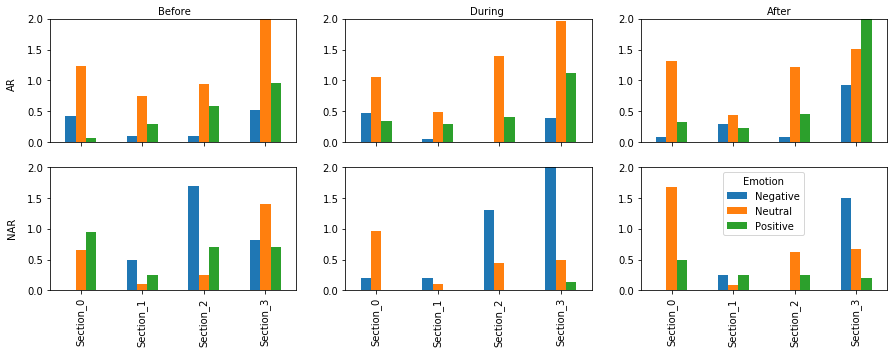

In [83]:
fig,a =  plt.subplots(figsize=(15, 5), nrows= 2,ncols=3)

plt1 = prevPosEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][0], legend = a[0][0].legend().set_visible(False))
plt1.set_xlabel("")
plt1.set_xticklabels("")
plt1.set_ylim((0,2.0))
plt2 = PosEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][1], legend = a[0][1].legend().set_visible(False) )
plt2.set_xlabel("")
plt2.set_xticklabels("")
plt2.set_ylim((0,2.0))
plt3 = nextPosEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][2], legend = a[0][2].legend().set_visible(False))
plt3.set_xlabel("")
plt3.set_xticklabels("")
plt3.set_ylim((0,2.0))

plt4 = prevPosEmNAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][0], legend = a[1][0].legend().set_visible(False))
plt4.set_xlabel("")
plt4.set_ylim((0,2.0))
plt5 = PosEmNAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][1], legend = a[1][1].legend().set_visible(False))
plt5.set_xlabel("")
plt5.set_ylim((0,2.0))
plt6 = nextPosEmNAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][2])
plt6.set_xlabel("")
plt6.set_ylim((0,2.0))
fig.text(0.24, 0.9, 'Before', ha='center', va='center')
fig.text(0.53, 0.9, 'During', ha='center', va='center')
fig.text(0.80, 0.9, 'After', ha='center', va='center')
fig.text(0.09, 0.3, 'NAR', ha='center', va='center', rotation='vertical')
fig.text(0.09, 0.7, 'AR', ha='center', va='center', rotation='vertical')





No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.09, 0.7, 'AR')

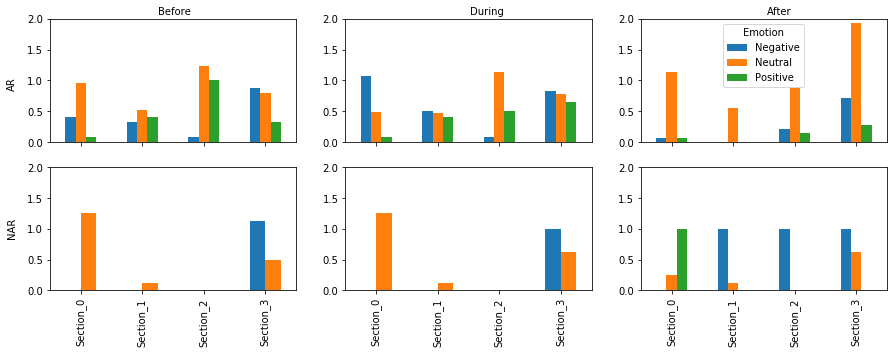

In [90]:
fig,a =  plt.subplots(figsize=(15, 5), ncols=3, nrows= 2)

plt7 = prevNegEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][0], legend = a[0][0].legend().set_visible(False))
plt7.set_xlabel("")
plt7.set_xticklabels("")
plt7.set_ylim((0,2.0))

plt8 = NegEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][1], legend = a[0][1].legend().set_visible(False))
plt8.set_xlabel("")
plt8.set_xticklabels("")
plt8.set_ylim((0,2.0))

plt9 = nextNegEmAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][2])
plt9.set_xlabel("")
plt9.set_xticklabels("")
plt9.set_ylim((0,2.0))

plt10 = prevNegEmNAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][0], legend = a[1][0].legend().set_visible(False))
plt10.set_xlabel("")
plt10.set_ylim((0,2.0))

plt11 = NegEmNAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][1], legend = a[1][1].legend().set_visible(False))
plt11.set_xlabel("")
plt11.set_ylim((0,2.0))

plt12 = nextNegEmNAR6.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][2], legend = a[1][2].legend().set_visible(False))
plt12.set_xlabel("")
plt12.set_ylim((0,2.0))

fig.text(0.24, 0.9, 'Before', ha='center', va='center')
fig.text(0.53, 0.9, 'During', ha='center', va='center')
fig.text(0.80, 0.9, 'After', ha='center', va='center')
fig.text(0.09, 0.3, 'NAR', ha='center', va='center', rotation='vertical')
fig.text(0.09, 0.7, 'AR', ha='center', va='center', rotation='vertical')


In [31]:
prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_1') & (prevPosEmAR6['Emotion']== 'Positive')]

,Section,Emotion,Count
5,Section_1,Positive,0.241667


In [89]:
prevNegEmNAR6.head(50)

,Section,Emotion,Count
0,Section_0,Neutral,1.250
1,Section_1,Neutral,0.125
2,Section_3,Negative,1.125
3,Section_3,Neutral,0.500
4,Section_2,Neutral,0.000


In [99]:
#Positive Object Negative Emotion in AR

PoSNegAR = prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_0') & (prevPosEmAR6['Emotion']== 'Negative')]
PoSNegAR = PoSNegAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_1') & (prevPosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_2') & (prevPosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_3') & (prevPosEmAR6['Emotion']== 'Negative')])
mapping = {'Negative': 'Before'}
PoSNegAR['Emotion'] = PoSNegAR['Emotion'].apply(lambda x: mapping[x])

PoSNegAR = PoSNegAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_0') & (PosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_1') & (PosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_2') & (PosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_3') & (PosEmAR6['Emotion']== 'Negative')])
mapping = {'Before': 'Before','Negative': 'During'}
PoSNegAR['Emotion'] = PoSNegAR['Emotion'].apply(lambda x: mapping[x])

PoSNegAR = PoSNegAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_0') & (nextPosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_1') & (nextPosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_2') & (nextPosEmAR6['Emotion']== 'Negative')])
PoSNegAR = PoSNegAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_3') & (nextPosEmAR6['Emotion']== 'Negative')])
mapping = {'During': 'During','Before': 'Before','Negative': 'Next'}
PoSNegAR['Emotion'] = PoSNegAR['Emotion'].apply(lambda x: mapping[x])





In [100]:
#Positive Object Netural EMotion in AR

PoSNeuAR = prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_0') & (prevPosEmAR6['Emotion']== 'Neutral')]
PoSNeuAR = PoSNeuAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_1') & (prevPosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_2') & (prevPosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_3') & (prevPosEmAR6['Emotion']== 'Neutral')])
mapping = {'Neutral': 'Before'}
PoSNeuAR['Emotion'] = PoSNeuAR['Emotion'].apply(lambda x: mapping[x])

PoSNeuAR = PoSNeuAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_0') & (PosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_1') & (PosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_2') & (PosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_3') & (PosEmAR6['Emotion']== 'Neutral')])
mapping = {'Before': 'Before','Neutral': 'During'}
PoSNeuAR['Emotion'] = PoSNeuAR['Emotion'].apply(lambda x: mapping[x])

PoSNeuAR = PoSNeuAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_0') & (nextPosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_1') & (nextPosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_2') & (nextPosEmAR6['Emotion']== 'Neutral')])
PoSNeuAR = PoSNeuAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_3') & (nextPosEmAR6['Emotion']== 'Neutral')])
mapping = {'During': 'During','Before': 'Before','Neutral': 'Next'}
PoSNeuAR['Emotion'] = PoSNeuAR['Emotion'].apply(lambda x: mapping[x])



In [101]:
#Positive Object Positive EMotion in AR

PoSPosAR = prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_0') & (prevPosEmAR6['Emotion']== 'Positive')]
PoSPosAR = PoSPosAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_1') & (prevPosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_2') & (prevPosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(prevPosEmAR6.loc[(prevPosEmAR6['Section']== 'Section_3') & (prevPosEmAR6['Emotion']== 'Positive')])
mapping = {'Positive': 'Before'}
PoSPosAR['Emotion'] = PoSPosAR['Emotion'].apply(lambda x: mapping[x])

PoSPosAR = PoSPosAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_0') & (PosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_1') & (PosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_2') & (PosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(PosEmAR6.loc[(PosEmAR6['Section']== 'Section_3') & (PosEmAR6['Emotion']== 'Positive')])
mapping = {'Before': 'Before','Positive': 'During'}
PoSPosAR['Emotion'] = PoSPosAR['Emotion'].apply(lambda x: mapping[x])

PoSPosAR = PoSPosAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_0') & (nextPosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_1') & (nextPosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_2') & (nextPosEmAR6['Emotion']== 'Positive')])
PoSPosAR = PoSPosAR.append(nextPosEmAR6.loc[(nextPosEmAR6['Section']== 'Section_3') & (nextPosEmAR6['Emotion']== 'Positive')])
mapping = {'During': 'During','Before': 'Before','Positive': 'Next'}
PoSPosAR['Emotion'] = PoSPosAR['Emotion'].apply(lambda x: mapping[x])


In [102]:
#Positive Object Negative Emotion in NAR

PoSNegNAR = prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_0') & (prevPosEmNAR6['Emotion']== 'Negative')]
PoSNegNAR = PoSNegNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_1') & (prevPosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_2') & (prevPosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_3') & (prevPosEmNAR6['Emotion']== 'Negative')])
mapping = {'Negative': 'Before'}
PoSNegNAR['Emotion'] = PoSNegNAR['Emotion'].apply(lambda x: mapping[x])

PoSNegNAR = PoSNegNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_0') & (PosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_1') & (PosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_2') & (PosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_3') & (PosEmNAR6['Emotion']== 'Negative')])
mapping = {'Before': 'Before','Negative': 'During'}
PoSNegNAR['Emotion'] = PoSNegNAR['Emotion'].apply(lambda x: mapping[x])

PoSNegNAR = PoSNegNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_0') & (nextPosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_1') & (nextPosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_2') & (nextPosEmNAR6['Emotion']== 'Negative')])
PoSNegNAR = PoSNegNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_3') & (nextPosEmNAR6['Emotion']== 'Negative')])
mapping = {'During': 'During','Before': 'Before','Negative': 'Next'}
PoSNegNAR['Emotion'] = PoSNegNAR['Emotion'].apply(lambda x: mapping[x])

In [103]:
#Positive Object Neutral Emotion in NAR

PoSNeuNAR = prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_0') & (prevPosEmNAR6['Emotion']== 'Neutral')]
PoSNeuNAR = PoSNeuNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_1') & (prevPosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_2') & (prevPosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_3') & (prevPosEmNAR6['Emotion']== 'Neutral')])
mapping = {'Neutral': 'Before'}
PoSNeuNAR['Emotion'] = PoSNeuNAR['Emotion'].apply(lambda x: mapping[x])

PoSNeuNAR = PoSNeuNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_0') & (PosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_1') & (PosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_2') & (PosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_3') & (PosEmNAR6['Emotion']== 'Neutral')])
mapping = {'Before': 'Before','Neutral': 'During'}
PoSNeuNAR['Emotion'] = PoSNeuNAR['Emotion'].apply(lambda x: mapping[x])

PoSNeuNAR = PoSNeuNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_0') & (nextPosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_1') & (nextPosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_2') & (nextPosEmNAR6['Emotion']== 'Neutral')])
PoSNeuNAR = PoSNeuNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_3') & (nextPosEmNAR6['Emotion']== 'Neutral')])
mapping = {'During': 'During','Before': 'Before','Neutral': 'Next'}
PoSNeuNAR['Emotion'] = PoSNeuNAR['Emotion'].apply(lambda x: mapping[x])


In [104]:
#Positive Object Positive Emotion in NAR

PoSPosNAR = prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_0') & (prevPosEmNAR6['Emotion']== 'Positive')]
PoSPosNAR = PoSPosNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_1') & (prevPosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_2') & (prevPosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(prevPosEmNAR6.loc[(prevPosEmNAR6['Section']== 'Section_3') & (prevPosEmNAR6['Emotion']== 'Positive')])
mapping = {'Positive': 'Before'}
PoSPosNAR['Emotion'] = PoSPosNAR['Emotion'].apply(lambda x: mapping[x])

PoSPosNAR = PoSPosNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_0') & (PosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_1') & (PosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_2') & (PosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(PosEmNAR6.loc[(PosEmNAR6['Section']== 'Section_3') & (PosEmNAR6['Emotion']== 'Positive')])
mapping = {'Before': 'Before','Positive': 'During'}
PoSPosNAR['Emotion'] = PoSPosNAR['Emotion'].apply(lambda x: mapping[x])

PoSPosNAR = PoSPosNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_0') & (nextPosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_1') & (nextPosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_2') & (nextPosEmNAR6['Emotion']== 'Positive')])
PoSPosNAR = PoSPosNAR.append(nextPosEmNAR6.loc[(nextPosEmNAR6['Section']== 'Section_3') & (nextPosEmNAR6['Emotion']== 'Positive')])
mapping = {'During': 'During','Before': 'Before','Positive': 'Next'}
PoSPosNAR['Emotion'] = PoSPosNAR['Emotion'].apply(lambda x: mapping[x])



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.09, 0.7, 'AR')

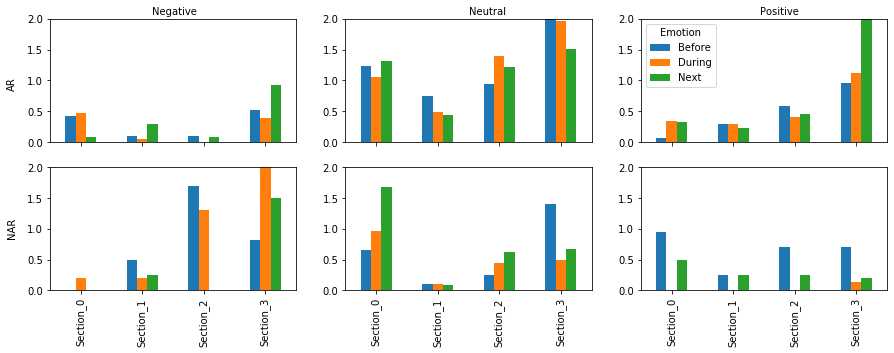

In [105]:
#Green Object In AR and NAR


fig,a =  plt.subplots(figsize=(15, 5), ncols=3, nrows= 2)

plt13 = PoSNegAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][0], legend = a[0][0].legend().set_visible(False))
plt13.set_xlabel("")
plt13.set_xticklabels("")
plt13.set_ylim((0,2.0))

plt14 = PoSNeuAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][1], legend = a[0][1].legend().set_visible(False))
plt14.set_xlabel("")
plt14.set_xticklabels("")
plt14.set_ylim((0,2.0))

plt15 = PoSPosAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][2])
plt15.set_xlabel("")
plt15.set_xticklabels("")
plt15.set_ylim((0,2.0))

plt16 = PoSNegNAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][0], legend = a[1][0].legend().set_visible(False))
plt16.set_xlabel("")
plt16.set_ylim((0,2.0))

plt17 = PoSNeuNAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][1], legend = a[1][1].legend().set_visible(False))
plt17.set_xlabel("")
plt17.set_ylim((0,2.0))

plt18 = PoSPosNAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][2], legend = a[1][2].legend().set_visible(False))
plt18.set_xlabel("")
plt18.set_ylim((0,2.0))

fig.text(0.24, 0.9, 'Negative', ha='center', va='center')
fig.text(0.53, 0.9, 'Neutral', ha='center', va='center')
fig.text(0.80, 0.9, 'Positive', ha='center', va='center')
fig.text(0.09, 0.3, 'NAR', ha='center', va='center', rotation='vertical')
fig.text(0.09, 0.7, 'AR', ha='center', va='center', rotation='vertical')





In [107]:
#Negative Object Negative Emotion in AR

NegNegAR = prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_0') & (prevNegEmAR6['Emotion']== 'Negative')]
NegNegAR = NegNegAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_1') & (prevNegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_2') & (prevNegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_3') & (prevNegEmAR6['Emotion']== 'Negative')])
mapping = {'Negative': 'Before'}
NegNegAR['Emotion'] = NegNegAR['Emotion'].apply(lambda x: mapping[x])

NegNegAR = NegNegAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_0') & (NegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_1') & (NegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_2') & (NegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_3') & (NegEmAR6['Emotion']== 'Negative')])
mapping = {'Before': 'Before','Negative': 'During'}
NegNegAR['Emotion'] = NegNegAR['Emotion'].apply(lambda x: mapping[x])

NegNegAR = NegNegAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_0') & (nextNegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_1') & (nextNegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_2') & (nextNegEmAR6['Emotion']== 'Negative')])
NegNegAR = NegNegAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_3') & (nextNegEmAR6['Emotion']== 'Negative')])
mapping = {'During': 'During','Before': 'Before','Negative': 'Next'}
NegNegAR['Emotion'] = NegNegAR['Emotion'].apply(lambda x: mapping[x])



In [108]:
#Negative Object Netural EMotion in AR

NegNeuAR = prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_0') & (prevNegEmAR6['Emotion']== 'Neutral')]
NegNeuAR = NegNeuAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_1') & (prevNegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_2') & (prevNegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_3') & (prevNegEmAR6['Emotion']== 'Neutral')])
mapping = {'Neutral': 'Before'}
NegNeuAR['Emotion'] = NegNeuAR['Emotion'].apply(lambda x: mapping[x])

NegNeuAR = NegNeuAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_0') & (NegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_1') & (NegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_2') & (NegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_3') & (NegEmAR6['Emotion']== 'Neutral')])
mapping = {'Before': 'Before','Neutral': 'During'}
NegNeuAR['Emotion'] = NegNeuAR['Emotion'].apply(lambda x: mapping[x])

NegNeuAR = NegNeuAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_0') & (nextNegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_1') & (nextNegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_2') & (nextNegEmAR6['Emotion']== 'Neutral')])
NegNeuAR = NegNeuAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_3') & (nextNegEmAR6['Emotion']== 'Neutral')])
mapping = {'During': 'During','Before': 'Before','Neutral': 'Next'}
NegNeuAR['Emotion'] = NegNeuAR['Emotion'].apply(lambda x: mapping[x])




In [109]:
#Negative Object Positive EMotion in AR

NegPosAR = prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_0') & (prevNegEmAR6['Emotion']== 'Positive')]
NegPosAR = NegPosAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_1') & (prevNegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_2') & (prevNegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(prevNegEmAR6.loc[(prevNegEmAR6['Section']== 'Section_3') & (prevNegEmAR6['Emotion']== 'Positive')])
mapping = {'Positive': 'Before'}
NegPosAR['Emotion'] = NegPosAR['Emotion'].apply(lambda x: mapping[x])

NegPosAR = NegPosAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_0') & (NegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_1') & (NegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_2') & (NegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(NegEmAR6.loc[(NegEmAR6['Section']== 'Section_3') & (NegEmAR6['Emotion']== 'Positive')])
mapping = {'Before': 'Before','Positive': 'During'}
NegPosAR['Emotion'] = NegPosAR['Emotion'].apply(lambda x: mapping[x])

NegPosAR = NegPosAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_0') & (nextNegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_1') & (nextNegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_2') & (nextNegEmAR6['Emotion']== 'Positive')])
NegPosAR = NegPosAR.append(nextNegEmAR6.loc[(nextNegEmAR6['Section']== 'Section_3') & (nextNegEmAR6['Emotion']== 'Positive')])
mapping = {'During': 'During','Before': 'Before','Positive': 'Next'}
NegPosAR['Emotion'] = NegPosAR['Emotion'].apply(lambda x: mapping[x])



In [147]:
#Negative Object Negative Emotion in NAR

NegNegNAR = prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_0') & (prevNegEmNAR6['Emotion']== 'Negative')]
NegNegNAR = NegNegNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_1') & (prevNegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_2') & (prevNegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_3') & (prevNegEmNAR6['Emotion']== 'Negative')])
mapping = {'Negative': 'Before'}
NegNegNAR['Emotion'] = NegNegNAR['Emotion'].apply(lambda x: mapping[x])

NegNegNAR = NegNegNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_0') & (NegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_1') & (NegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_2') & (NegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_3') & (NegEmNAR6['Emotion']== 'Negative')])
mapping = {'Before': 'Before','Negative': 'During'}
NegNegNAR['Emotion'] = NegNegNAR['Emotion'].apply(lambda x: mapping[x])

NegNegNAR = NegNegNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_0') & (nextNegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_1') & (nextNegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_2') & (nextNegEmNAR6['Emotion']== 'Negative')])
NegNegNAR = NegNegNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_3') & (nextNegEmNAR6['Emotion']== 'Negative')])
mapping = {'During': 'During','Before': 'Before','Negative': 'Next'}
NegNegNAR['Emotion'] = NegNegNAR['Emotion'].apply(lambda x: mapping[x])


In [148]:
#Negative Object Neutral Emotion in NAR

NegNeuNAR = prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_0') & (prevNegEmNAR6['Emotion']== 'Neutral')]
NegNeuNAR = NegNeuNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_1') & (prevNegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_2') & (prevNegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_3') & (prevNegEmNAR6['Emotion']== 'Neutral')])
mapping = {'Neutral': 'Before'}
NegNeuNAR['Emotion'] = NegNeuNAR['Emotion'].apply(lambda x: mapping[x])

NegNeuNAR = NegNeuNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_0') & (NegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_1') & (NegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_2') & (NegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_3') & (NegEmNAR6['Emotion']== 'Neutral')])
mapping = {'Before': 'Before','Neutral': 'During'}
NegNeuNAR['Emotion'] = NegNeuNAR['Emotion'].apply(lambda x: mapping[x])

NegNeuNAR = NegNeuNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_0') & (nextNegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_1') & (nextNegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_2') & (nextNegEmNAR6['Emotion']== 'Neutral')])
NegNeuNAR = NegNeuNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_3') & (nextNegEmNAR6['Emotion']== 'Neutral')])
mapping = {'During': 'During','Before': 'Before','Neutral': 'Next'}
NegNeuNAR['Emotion'] = NegNeuNAR['Emotion'].apply(lambda x: mapping[x])



In [149]:
#Negative Object Positive Emotion in NAR

NegPosNAR = prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_0') & (prevNegEmNAR6['Emotion']== 'Positive')]
NegPosNAR = NegPosNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_1') & (prevNegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_2') & (prevNegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(prevNegEmNAR6.loc[(prevNegEmNAR6['Section']== 'Section_3') & (prevNegEmNAR6['Emotion']== 'Positive')])
mapping = {'Positive': 'Before'}
NegPosNAR['Emotion'] = NegPosNAR['Emotion'].apply(lambda x: mapping[x])

NegPosNAR = NegPosNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_0') & (NegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_1') & (NegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_2') & (NegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(NegEmNAR6.loc[(NegEmNAR6['Section']== 'Section_3') & (NegEmNAR6['Emotion']== 'Positive')])
mapping = {'Before': 'Before','Positive': 'During'}
NegPosNAR['Emotion'] = NegPosNAR['Emotion'].apply(lambda x: mapping[x])

NegPosNAR = NegPosNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_0') & (nextNegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_1') & (nextNegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_2') & (nextNegEmNAR6['Emotion']== 'Positive')])
NegPosNAR = NegPosNAR.append(nextNegEmNAR6.loc[(nextNegEmNAR6['Section']== 'Section_3') & (nextNegEmNAR6['Emotion']== 'Positive')])
mapping = {'During': 'During','Before': 'Before','Positive': 'Next'}
NegPosNAR['Emotion'] = NegPosNAR['Emotion'].apply(lambda x: mapping[x])




In [150]:
df2 = pd.DataFrame({"Section":['Section_0','Section_1','Section_2','Section_3'], 
                    "Emotion":['Before','During','During','Before'],
                    "Count":[0.0,0.0,0.0,0.0]}) 
df3 = pd.DataFrame({"Section":['Section_0'], 
                    "Emotion":['Before'],
                    "Count":[0.0]}) 

NegPosNAR = NegPosNAR.append(df2, ignore_index = True)
NegNegNAR =NegNegNAR.append(df3, ignore_index = True)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.09, 0.7, 'AR')

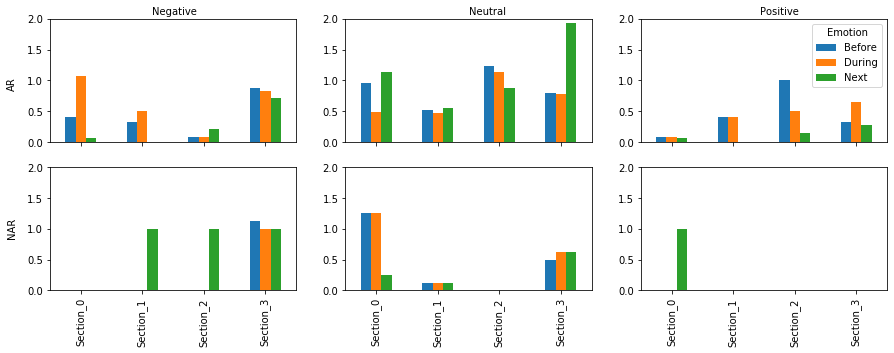

In [151]:
#Red Object In AR and NAR


fig,a =  plt.subplots(figsize=(15, 5), ncols=3, nrows= 2)

plt19 = NegNegAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][0], legend = a[0][0].legend().set_visible(False))
plt19.set_xlabel("")
plt19.set_xticklabels("")
plt19.set_ylim((0,2.0))

plt20 = NegNeuAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][1], legend = a[0][1].legend().set_visible(False))
plt20.set_xlabel("")
plt20.set_xticklabels("")
plt20.set_ylim((0,2.0))

plt21 = NegPosAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[0][2])
plt21.set_xlabel("")
plt21.set_xticklabels("")
plt21.set_ylim((0,2.0))

plt22 = NegNegNAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][0], legend = a[1][0].legend().set_visible(False))
plt22.set_xlabel("")
plt22.set_ylim((0,2.0))

plt23 = NegNeuNAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][1], legend = a[1][1].legend().set_visible(False))
plt23.set_xlabel("")
plt23.set_ylim((0,2.0))

plt24 = NegPosNAR.pivot(index='Section', columns='Emotion', values='Count').plot(kind='bar', ax = a[1][2], legend = a[1][2].legend().set_visible(False))
plt24.set_xlabel("")
plt24.set_ylim((0,2.0))

fig.text(0.24, 0.9, 'Negative', ha='center', va='center')
fig.text(0.53, 0.9, 'Neutral', ha='center', va='center')
fig.text(0.80, 0.9, 'Positive', ha='center', va='center')
fig.text(0.09, 0.3, 'NAR', ha='center', va='center', rotation='vertical')
fig.text(0.09, 0.7, 'AR', ha='center', va='center', rotation='vertical')





In [12]:
# # prevPosEmAR 
# # nextPosEmAR
# # prevPosEmNAR
# # nextPosEmNAR



# rt = prevPosEmAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# prevPosEmAR['n_ts'] = prevPosEmAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = nextPosEmAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# nextPosEmAR['n_ts'] = nextPosEmAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = prevPosEmNAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# prevPosEmNAR['n_ts'] = prevPosEmNAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)



# rt = nextPosEmNAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# nextPosEmNAR['n_ts'] = nextPosEmNAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)




In [13]:
# # prevNegEmAR
# # nextNegEmAR
# # prevNegEmNAR
# # nextNegEmNAR


# rt = prevNegEmAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# prevNegEmAR['n_ts'] = prevNegEmAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = nextNegEmAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# nextNegEmAR['n_ts'] = nextNegEmAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = prevNegEmNAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# prevNegEmNAR['n_ts'] = prevNegEmNAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = nextNegEmNAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# nextNegEmNAR['n_ts'] = nextNegEmNAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


In [14]:
# # PosEmAR
# # PosEmNAR
# # NegEmAR
# # NegEmNAR

# rt = PosEmAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# PosEmAR['n_ts'] = PosEmAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)

# rt = PosEmNAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# PosEmNAR['n_ts'] = PosEmNAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = NegEmAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# NegEmAR['n_ts'] = NegEmAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)


# rt = NegEmNAR.groupby(['User','Section']).apply(
#     lambda x: (
#         ( (x['timestamp'] - x['timestamp'].min()).apply(lambda x: x.seconds) ) / 
#         ( (x['timestamp'].max() - x['timestamp'].min()).seconds )
#     )
# )
# NegEmNAR['n_ts'] = NegEmNAR.apply(lambda x: rt.loc[ x['User'], x['Section'] ][x.name], axis=1)

In [15]:
# prevPosEmAR[['n_ts']] = prevPosEmAR[['n_ts']].replace([np.nan], [1])
# nextPosEmAR[['n_ts']] = nextPosEmAR[['n_ts']].replace([np.nan], [1])
# prevPosEmNAR[['n_ts']] = prevPosEmNAR[['n_ts']].replace([np.nan], [1])
# nextPosEmNAR[['n_ts']] = nextPosEmNAR[['n_ts']].replace([np.nan], [1])

# prevNegEmAR[['n_ts']] = prevNegEmAR[['n_ts']].replace([np.nan], [1])
# nextNegEmAR[['n_ts']] = nextNegEmAR[['n_ts']].replace([np.nan], [1])
# prevNegEmNAR[['n_ts']] = prevNegEmNAR[['n_ts']].replace([np.nan], [1])
# nextNegEmNAR[['n_ts']] = nextNegEmNAR[['n_ts']].replace([np.nan], [1])


# PosEmAR[['n_ts']] = PosEmAR[['n_ts']].replace([np.nan], [1])
# PosEmNAR[['n_ts']] = PosEmNAR[['n_ts']].replace([np.nan], [1])
# NegEmAR[['n_ts']] = NegEmAR[['n_ts']].replace([np.nan], [1])
# NegEmNAR[['n_ts']] = NegEmNAR[['n_ts']].replace([np.nan], [1])

In [16]:
# for index, gdf in prevPosEmAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     prevPosEmAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in nextPosEmAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     nextPosEmAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in prevPosEmNAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     prevPosEmNAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in nextPosEmNAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     nextPosEmNAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']

In [17]:
# for index, gdf in prevNegEmAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     prevNegEmAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in nextNegEmAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     nextNegEmAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in prevNegEmNAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     prevNegEmNAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in nextNegEmNAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     nextNegEmNAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']

In [18]:
# for index, gdf in PosEmAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     PosEmAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in PosEmNAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     PosEmNAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in NegEmAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     NegEmAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']
    
# for index, gdf in NegEmNAR.groupby(["User"]):
#     tmp = gdf.copy()
#     tmp.loc[gdf["Section"] == "Section_1", "n_ts"] += 1
#     tmp.loc[gdf["Section"] == "Section_2", "n_ts"] += 2
#     tmp.loc[gdf["Section"] == "Section_3", "n_ts"] += 3
#     NegEmNAR.loc[gdf.index, 'd_ts'] = tmp['n_ts']